In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from env import get_db_url
import acquire as acq

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = acq.get_superstore_df()

df.head()

Reading from CSV file...


,Unnamed: 0,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",South
2,2,1,FUR-TA-10000577,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
3,3,1,OFF-ST-10000760,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
4,4,1,OFF-PA-10002365,AA-10480,11,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South


In [3]:
df = df.drop(columns= ['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region ID      1734 non-null   int64  
 1   Product ID     1734 non-null   object 
 2   Customer ID    1734 non-null   object 
 3   Category ID    1734 non-null   int64  
 4   Order ID       1734 non-null   object 
 5   Order Date     1734 non-null   object 
 6   Ship Date      1734 non-null   object 
 7   Ship Mode      1734 non-null   object 
 8   Segment        1734 non-null   object 
 9   Country        1734 non-null   object 
 10  City           1734 non-null   object 
 11  State          1734 non-null   object 
 12  Postal Code    1734 non-null   float64
 13  Sales          1734 non-null   float64
 14  Quantity       1734 non-null   float64
 15  Discount       1734 non-null   float64
 16  Profit         1734 non-null   float64
 17  Category       1734 non-null   object 
 18  Sub-Cate

In [4]:
df = acq.clean_superstore_df(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   product_id     1734 non-null   object         
 1   customer_id    1734 non-null   object         
 2   order_id       1734 non-null   object         
 3   order_date     1734 non-null   datetime64[ns] 
 4   ship_date      1734 non-null   datetime64[ns] 
 5   ship_mode      1734 non-null   object         
 6   segment        1734 non-null   object         
 7   country        1734 non-null   object         
 8   city           1734 non-null   object         
 9   state          1734 non-null   object         
 10  postal_code    1734 non-null   int64          
 11  sales          1734 non-null   float64        
 12  quantity       1734 non-null   float64        
 13  discount       1734 non-null   float64        
 14  profit         1734 non-null   float64

In [5]:
# Create separate dfs for product categories
furniture = df.copy()[df.category ==  'Furniture']
ofc_supplies = df.copy()[df.category == 'Office Supplies']
tech = df.copy()[df.category == 'Technology']

### Overall profit margin and profit

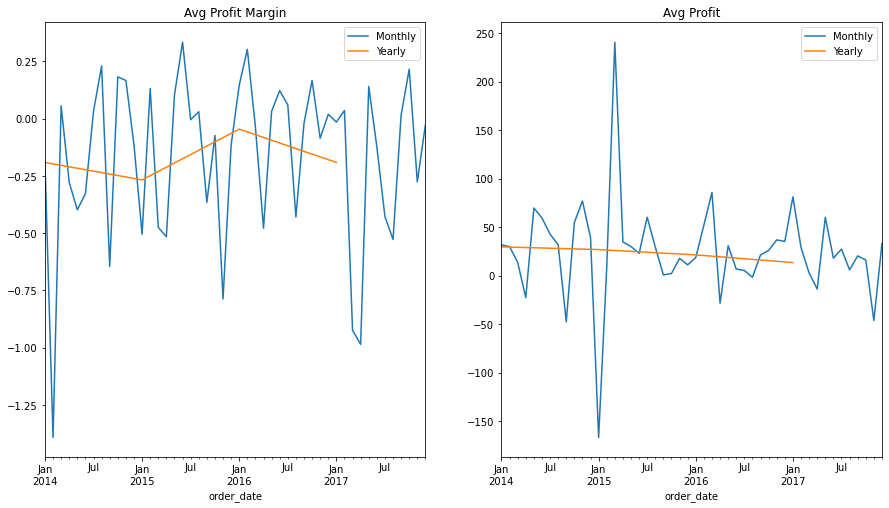

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(121)
df.resample('M').profit_margin.mean().plot(label= 'Monthly')
df.resample('Y').profit_margin.mean().plot(label= 'Yearly')
plt.title('Avg Profit Margin')
plt.legend()

plt.subplot(122)
df.resample('M').profit.mean().plot(label= 'Monthly')
df.resample('Y').profit.mean().plot(label= 'Yearly')
plt.title('Avg Profit')
plt.legend()

### Overall sales and revenue

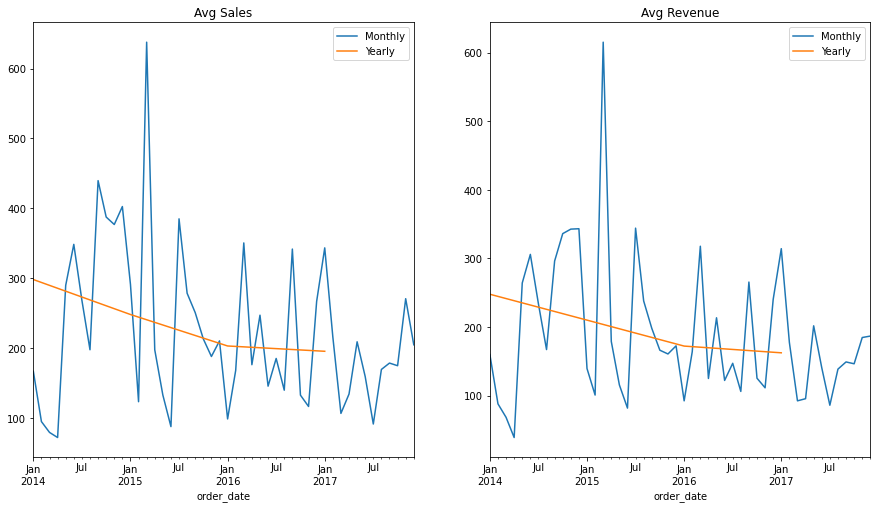

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(121)
df.resample('M').sales.mean().plot(label= 'Monthly')
df.resample('Y').sales.mean().plot(label= 'Yearly')
plt.title('Avg Sales')
plt.legend()

plt.subplot(122)
df.resample('M').revenue.mean().plot(label= 'Monthly')
df.resample('Y').revenue.mean().plot(label= 'Yearly')
plt.title('Avg Revenue')
plt.legend()

### Avg sales by category 

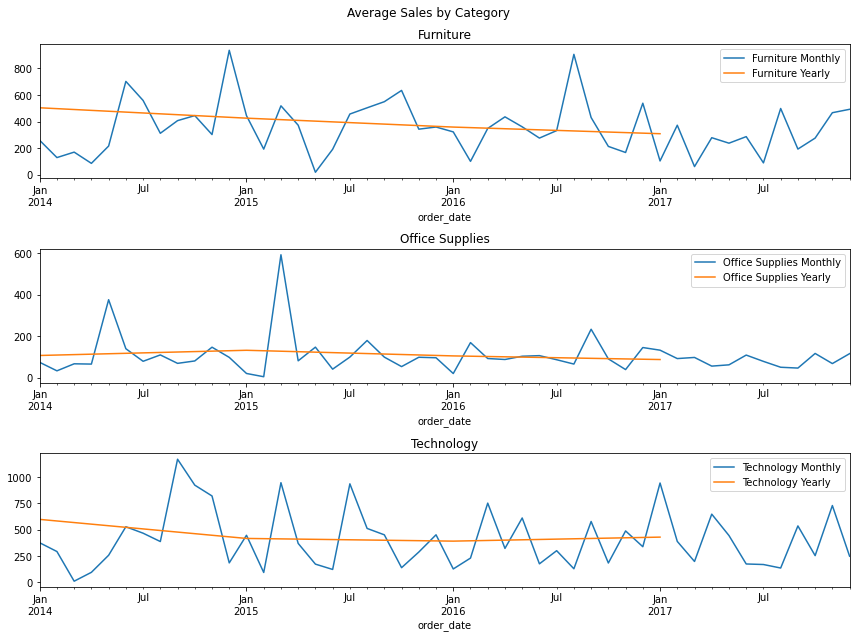

In [40]:
plt.figure(figsize=(12,9))

plt.suptitle('Average Sales by Category')

plt.subplot(311)
furniture.resample('M').sales.mean().plot(label= 'Furniture Monthly')
furniture.resample('Y').sales.mean().plot(label= 'Furniture Yearly')
plt.title('Furniture')
plt.legend()

plt.subplot(312)
ofc_supplies.resample('M').sales.mean().plot(label= 'Office Supplies Monthly')
ofc_supplies.resample('Y').sales.mean().plot(label= 'Office Supplies Yearly')
plt.title('Office Supplies')
plt.legend()

plt.subplot(313)
tech.resample('M').sales.mean().plot(label= 'Technology Monthly')
tech.resample('Y').sales.mean().plot(label= 'Technology Yearly')
plt.title('Technology')
plt.legend()

plt.tight_layout()


### Furniture sales

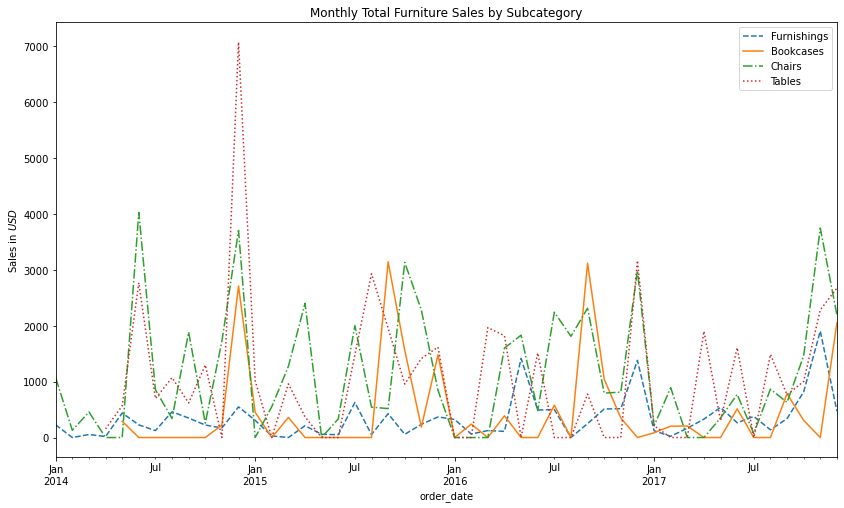

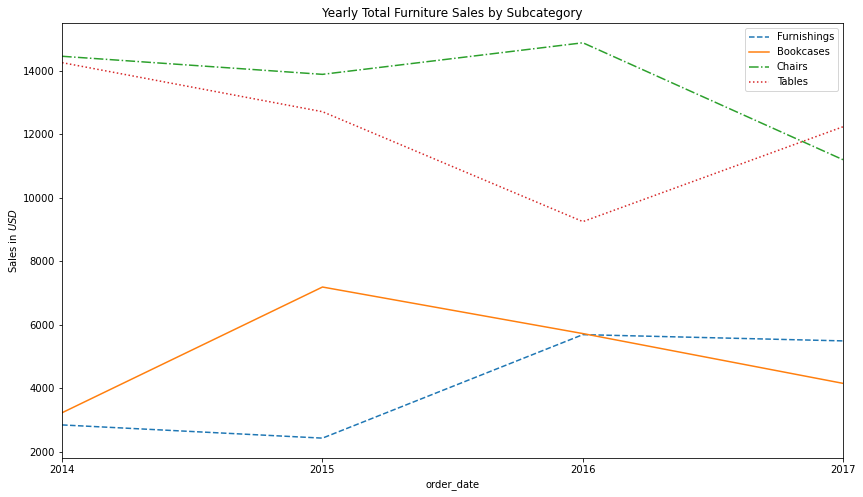

In [50]:
plt.figure(figsize=(14,8))
furniture[furniture.sub_cat == 'Furnishings'].resample('M').sales.sum().plot(label='Furnishings', ls= '--')
furniture[furniture.sub_cat == 'Bookcases'].resample('M').sales.sum().plot(label='Bookcases')
furniture[furniture.sub_cat == 'Chairs'].resample('M').sales.sum().plot(label='Chairs', ls= '-.')
furniture[furniture.sub_cat == 'Tables'].resample('M').sales.sum().plot(label='Tables', ls= ':')
plt.ylabel('Sales in $USD$')
plt.title('Monthly Total Furniture Sales by Subcategory')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))
furniture[furniture.sub_cat == 'Furnishings'].resample('Y').sales.sum().plot(label='Furnishings', ls= '--')
furniture[furniture.sub_cat == 'Bookcases'].resample('Y').sales.sum().plot(label='Bookcases')
furniture[furniture.sub_cat == 'Chairs'].resample('Y').sales.sum().plot(label='Chairs', ls= '-.')
furniture[furniture.sub_cat == 'Tables'].resample('Y').sales.sum().plot(label='Tables', ls= ':')
plt.ylabel('Sales in $USD$')
plt.title('Yearly Total Furniture Sales by Subcategory')
plt.legend()

### Office Supplies sales

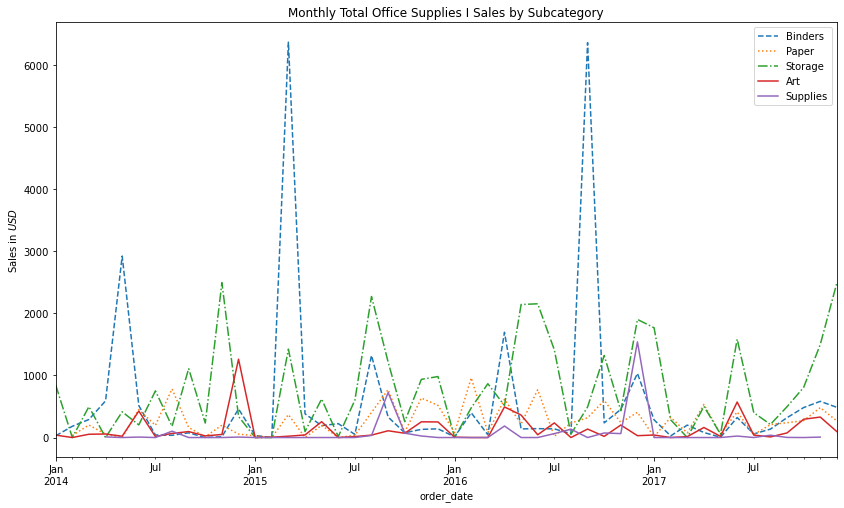

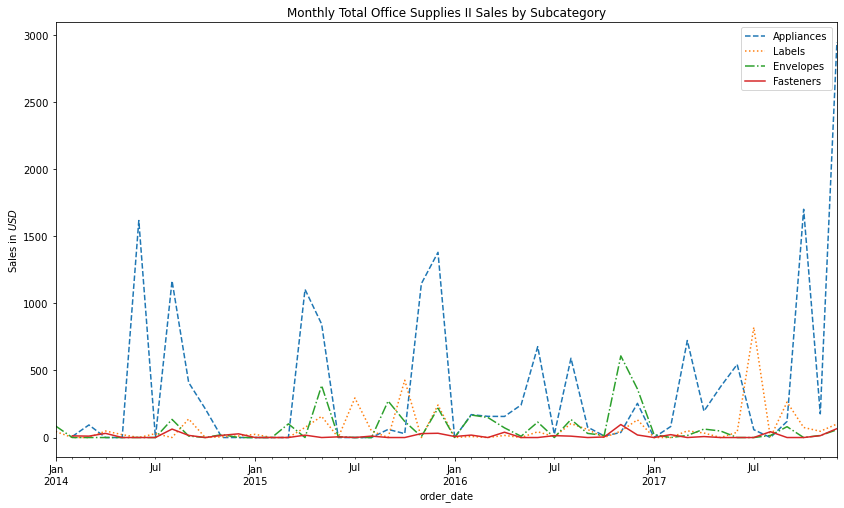

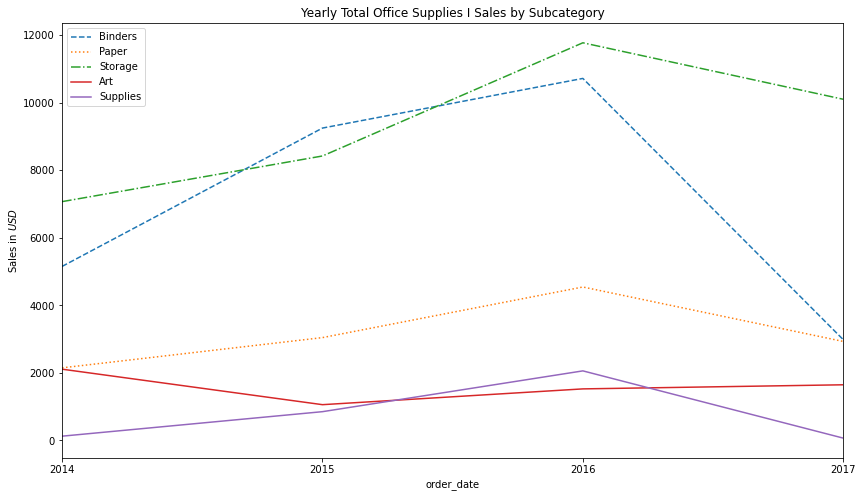

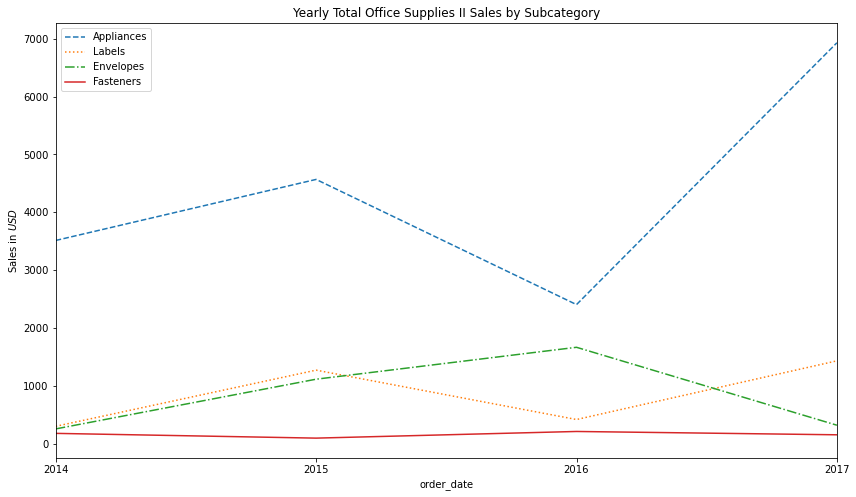

In [51]:
plt.figure(figsize=(14,8))
ofc_supplies[ofc_supplies.sub_cat == 'Binders'].resample('M').sales.sum().plot(label='Binders', ls='--')
ofc_supplies[ofc_supplies.sub_cat == 'Paper'].resample('M').sales.sum().plot(label='Paper', ls=':')
ofc_supplies[ofc_supplies.sub_cat == 'Storage'].resample('M').sales.sum().plot(label='Storage', ls='-.')
ofc_supplies[ofc_supplies.sub_cat == 'Art'].resample('M').sales.sum().plot(label='Art', ls ='-')
ofc_supplies[ofc_supplies.sub_cat == 'Supplies'].resample('M').sales.sum().plot(label='Supplies')

plt.ylabel('Sales in $USD$')
plt.title('Monthly Total Office Supplies I Sales by Subcategory')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))
ofc_supplies[ofc_supplies.sub_cat == 'Appliances'].resample('M').sales.sum().plot(label='Appliances', ls='--')
ofc_supplies[ofc_supplies.sub_cat == 'Labels'].resample('M').sales.sum().plot(label='Labels',ls=':')
ofc_supplies[ofc_supplies.sub_cat == 'Envelopes'].resample('M').sales.sum().plot(label='Envelopes', ls='-.')
ofc_supplies[ofc_supplies.sub_cat == 'Fasteners'].resample('M').sales.sum().plot(label='Fasteners')

plt.ylabel('Sales in $USD$')
plt.title('Monthly Total Office Supplies II Sales by Subcategory')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))
ofc_supplies[ofc_supplies.sub_cat == 'Binders'].resample('Y').sales.sum().plot(label='Binders', ls='--')
ofc_supplies[ofc_supplies.sub_cat == 'Paper'].resample('Y').sales.sum().plot(label='Paper', ls =':')
ofc_supplies[ofc_supplies.sub_cat == 'Storage'].resample('Y').sales.sum().plot(label='Storage', ls='-.')
ofc_supplies[ofc_supplies.sub_cat == 'Art'].resample('Y').sales.sum().plot(label='Art', ls='-')
ofc_supplies[ofc_supplies.sub_cat == 'Supplies'].resample('Y').sales.sum().plot(label='Supplies')

plt.ylabel('Sales in $USD$')
plt.title('Yearly Total Office Supplies I Sales by Subcategory')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))
ofc_supplies[ofc_supplies.sub_cat == 'Appliances'].resample('Y').sales.sum().plot(label='Appliances', ls='--')
ofc_supplies[ofc_supplies.sub_cat == 'Labels'].resample('Y').sales.sum().plot(label='Labels',ls= ':')
ofc_supplies[ofc_supplies.sub_cat == 'Envelopes'].resample('Y').sales.sum().plot(label='Envelopes', ls='-.')
ofc_supplies[ofc_supplies.sub_cat == 'Fasteners'].resample('Y').sales.sum().plot(label='Fasteners')

plt.ylabel('Sales in $USD$')
plt.title('Yearly Total Office Supplies II Sales by Subcategory')
plt.legend()

### Technology sales

Accessories    79
Phones         76
Machines       12
Copiers         7

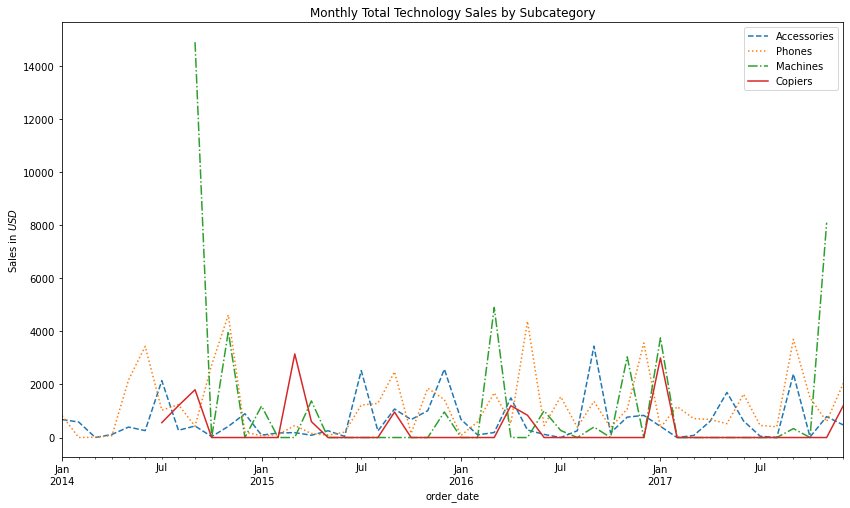

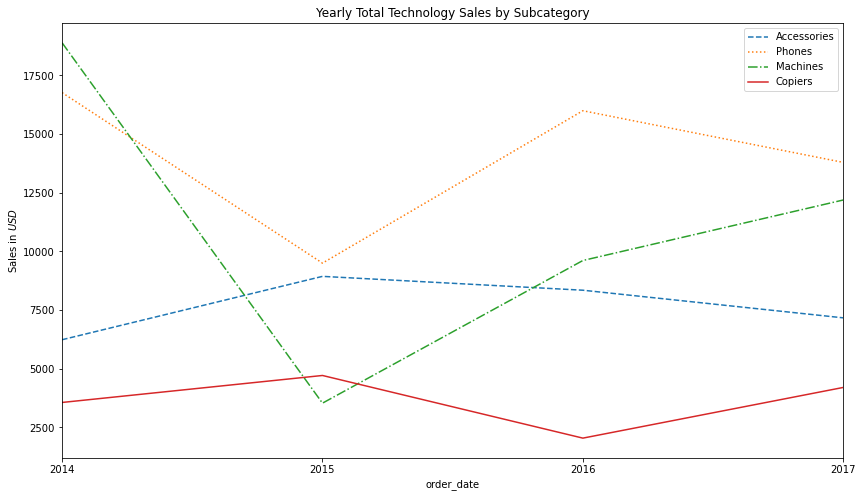

In [52]:
plt.figure(figsize=(14,8))
tech[tech.sub_cat == 'Accessories'].resample('M').sales.sum().plot(label='Accessories', ls='--')
tech[tech.sub_cat == 'Phones'].resample('M').sales.sum().plot(label='Phones', ls=':')
tech[tech.sub_cat == 'Machines'].resample('M').sales.sum().plot(label='Machines', ls='-.')
tech[tech.sub_cat == 'Copiers'].resample('M').sales.sum().plot(label='Copiers')
plt.ylabel('Sales in $USD$')
plt.title('Monthly Total Technology Sales by Subcategory')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))
tech[tech.sub_cat == 'Accessories'].resample('Y').sales.sum().plot(label='Accessories', ls='--')
tech[tech.sub_cat == 'Phones'].resample('Y').sales.sum().plot(label='Phones', ls=':')
tech[tech.sub_cat == 'Machines'].resample('Y').sales.sum().plot(label='Machines', ls='-.')
tech[tech.sub_cat == 'Copiers'].resample('Y').sales.sum().plot(label='Copiers')
plt.ylabel('Sales in $USD$')
plt.title('Yearly Total Technology Sales by Subcategory')
plt.legend()

### Profits and Margins

<Figure size 432x288 with 0 Axes>

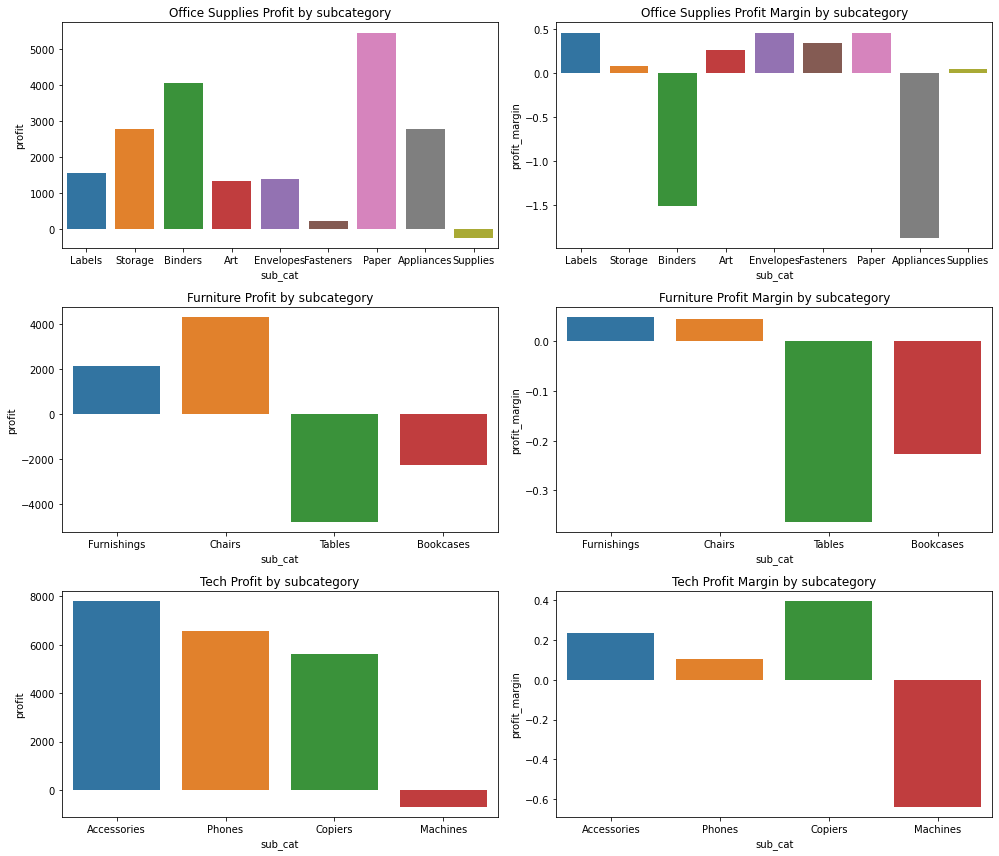

In [59]:
plt.summer()

plt.figure(figsize=(14,12))
plt.subplot(321)

sns.barplot(data=ofc_supplies, y='profit', x= 'sub_cat', ci= None, estimator= np.sum)
plt.title('Office Supplies Profit by subcategory')

plt.subplot(322)
#ofc_supplies.groupby(ofc_supplies.sub_cat).profit_margin.mean().plot.bar()
sns.barplot(data=ofc_supplies, y='profit_margin', x='sub_cat', ci=None)
plt.title('Office Supplies Profit Margin by subcategory')

plt.subplot(323)
#furniture.groupby(furniture.sub_cat).profit.sum().plot.bar()
sns.barplot(data=furniture, y='profit', x='sub_cat', ci=None, estimator=np.sum)
plt.title('Furniture Profit by subcategory')

plt.subplot(324)
#furniture.groupby(furniture.sub_cat).profit_margin.mean().plot.bar()
sns.barplot(data=furniture, y='profit_margin', x='sub_cat', ci=None)
plt.title('Furniture Profit Margin by subcategory')


plt.subplot(325)
#tech.groupby(tech.sub_cat).profit.sum().plot.bar()
sns.barplot(data=tech, y='profit', x='sub_cat', ci=None, estimator=np.sum)
plt.title('Tech Profit by subcategory')

plt.subplot(326)
#tech.groupby(tech.sub_cat).profit_margin.mean().plot.bar()
sns.barplot(data=tech, y='profit_margin', x='sub_cat', ci=None)
plt.title('Tech Profit Margin by subcategory')

plt.tight_layout()



In [60]:
print(f'Furniture avg profit margin: {furniture.profit_margin.mean()}\nOffice Supplies avg profit margin:{ofc_supplies.profit_margin.mean()}')

Furniture avg profit margin: -0.050091568399115105
Office Supplies avg profit margin:-0.2883070548826868


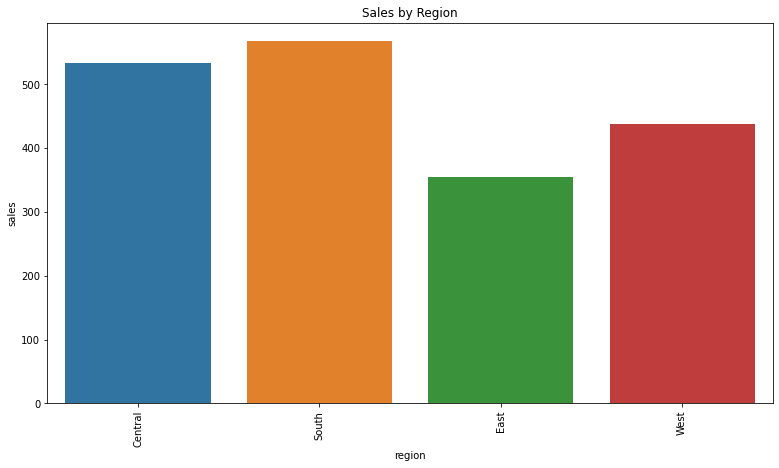

Text(0.5, 1.0, 'Profit by Region')

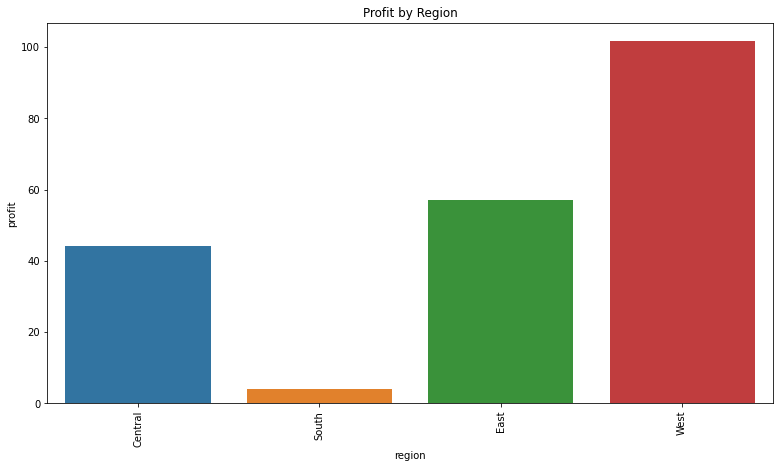

In [78]:
plt.figure(figsize=(13,7))
#tech.groupby('region').resample('M').sales.mean().plot(label='Monthly')
sns.barplot(data= tech, x='region', y='sales', ci=None)
plt.xticks(rotation='vertical')
plt.title('Sales by Region')


plt.show()

plt.figure(figsize=(13,7))
#tech.groupby('region').resample('M').profit.mean().plot(label='Monthly')
sns.barplot(data= tech, x='region', y='profit', ci=None)
plt.xticks(rotation='vertical')
plt.title('Profit by Region')




<AxesSubplot:xlabel='region', ylabel='sales'>

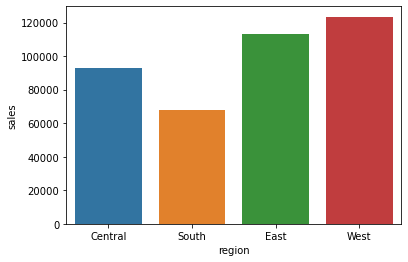

In [72]:
sns.barplot(data= df, x='region', y='sales', ci=None, estimator=np.sum)

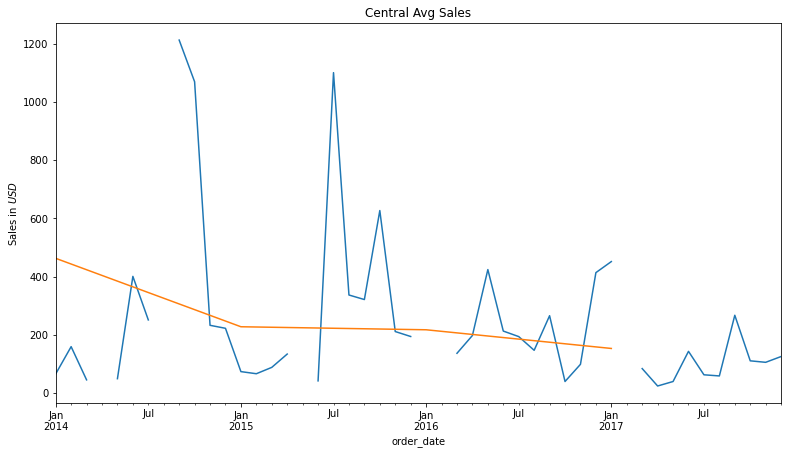

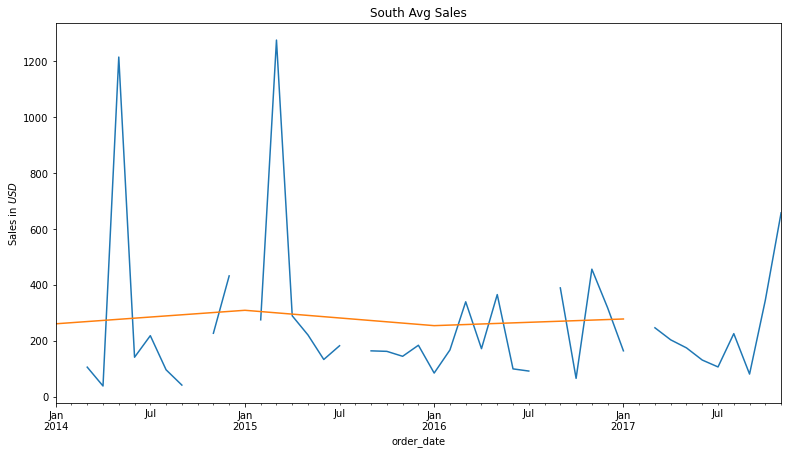

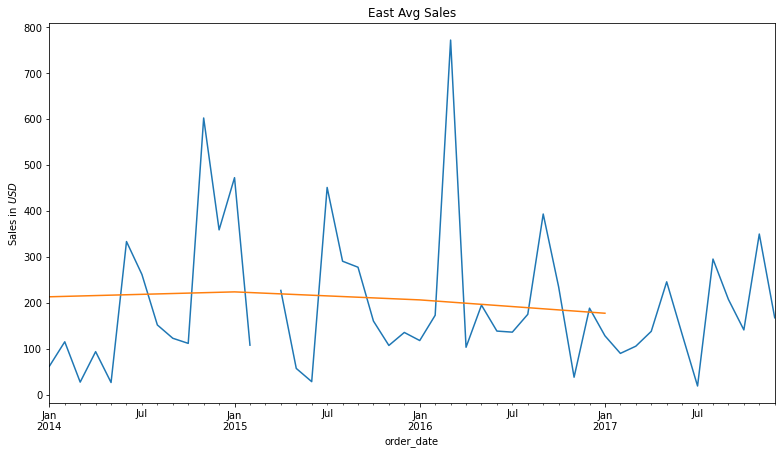

Text(0.5, 1.0, 'West Avg Sales')

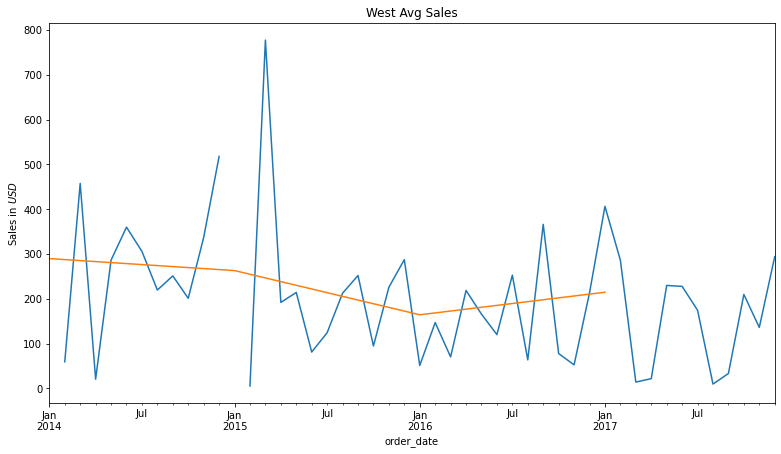

In [73]:
central = df.copy()[df.region == 'Central']
south = df.copy()[df.region == 'South']
east = df.copy()[df.region == 'East']
west = df.copy()[df.region == 'West']

plt.figure(figsize=(13,7))
central.resample('M').sales.mean().plot(label='Central Monthly')
central.resample('Y').sales.mean().plot(label='Central Yearly')
plt.ylabel('Sales in $USD$')
plt.title('Central Avg Sales')

plt.show()

plt.figure(figsize=(13,7))
south.resample('M').sales.mean().plot(label='South Monthly')
south.resample('Y').sales.mean().plot(label='South Yearly')
plt.ylabel('Sales in $USD$')
plt.title('South Avg Sales')

plt.show()

plt.figure(figsize=(13,7))
east.resample('M').sales.mean().plot(label='East Monthly')
east.resample('Y').sales.mean().plot(label='East Yearly')
plt.ylabel('Sales in $USD$')
plt.title('East Avg Sales')

plt.show()

plt.figure(figsize=(13,7))
west.resample('M').sales.mean().plot(label='West Monthly')
west.resample('Y').sales.mean().plot(label='West Yearly')
plt.ylabel('Sales in $USD$')
plt.title('West Avg Sales')



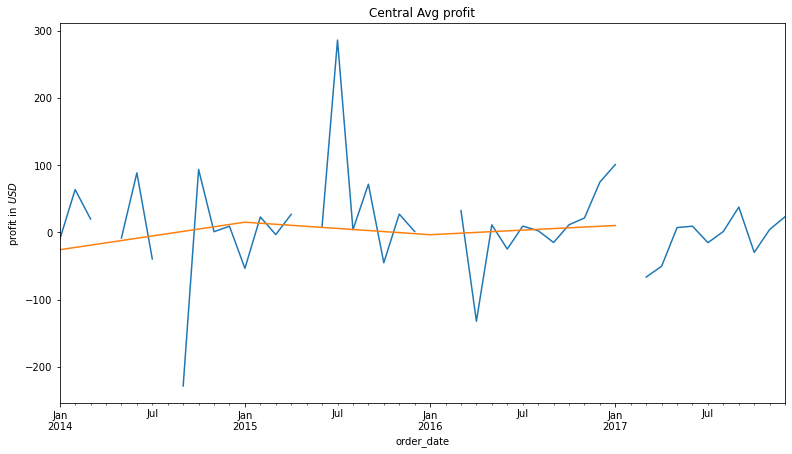

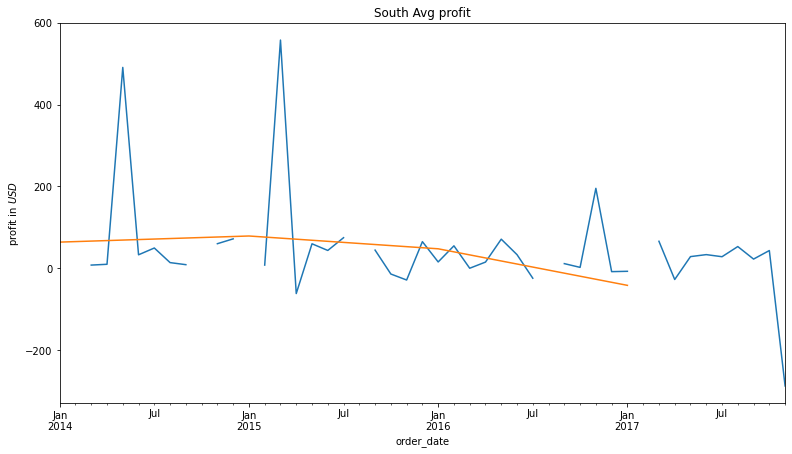

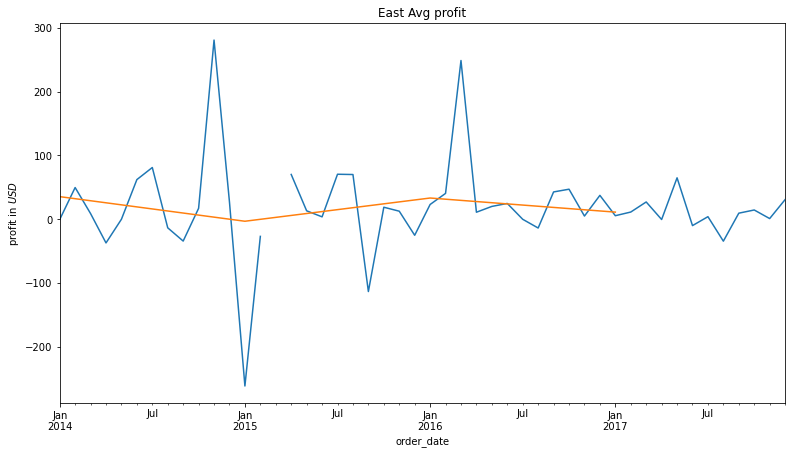

Text(0.5, 1.0, 'West Avg profit')

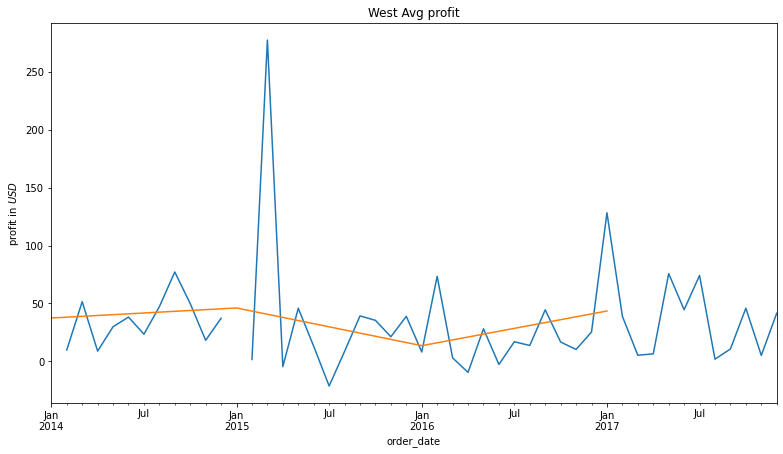

In [74]:
plt.figure(figsize=(13,7))
central.resample('M').profit.mean().plot(label='Central Monthly')
central.resample('Y').profit.mean().plot(label='Central Yearly')
plt.ylabel('profit in $USD$')
plt.title('Central Avg profit')

plt.show()

plt.figure(figsize=(13,7))
south.resample('M').profit.mean().plot(label='South Monthly')
south.resample('Y').profit.mean().plot(label='South Yearly')
plt.ylabel('profit in $USD$')
plt.title('South Avg profit')

plt.show()

plt.figure(figsize=(13,7))
east.resample('M').profit.mean().plot(label='East Monthly')
east.resample('Y').profit.mean().plot(label='East Yearly')
plt.ylabel('profit in $USD$')
plt.title('East Avg profit')

plt.show()

plt.figure(figsize=(13,7))
west.resample('M').profit.mean().plot(label='West Monthly')
west.resample('Y').profit.mean().plot(label='West Yearly')
plt.ylabel('profit in $USD$')
plt.title('West Avg profit')

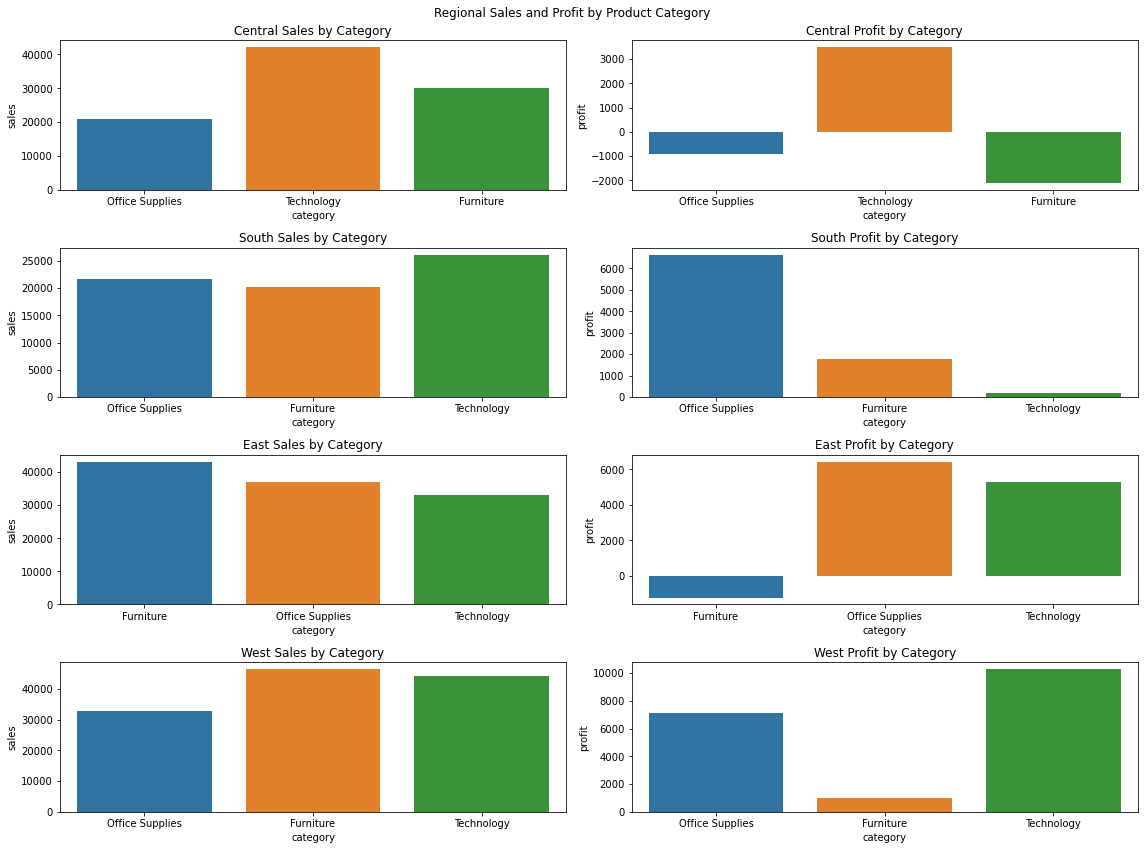

In [77]:
# Plot sales and profit for each region by category
plt.figure(figsize=(16,12))
plt.suptitle('Regional Sales and Profit by Product Category')

plt.subplot(421)
sns.barplot(data=central, x='category', y='sales', ci=None, estimator=np.sum)
plt.title('Central Sales by Category')

plt.subplot(422)
sns.barplot(data=central, x='category', y='profit', ci=None, estimator=np.sum)
plt.title('Central Profit by Category')

plt.subplot(423)
sns.barplot(data=south, x='category', y='sales', ci=None, estimator=np.sum)
plt.title('South Sales by Category')

plt.subplot(424)
sns.barplot(data=south, x='category', y='profit', ci=None, estimator=np.sum)
plt.title('South Profit by Category')

plt.subplot(425)
sns.barplot(data=east, x='category', y='sales', ci=None, estimator=np.sum)
plt.title('East Sales by Category')

plt.subplot(426)
sns.barplot(data=east, x='category', y='profit', ci=None, estimator=np.sum)
plt.title('East Profit by Category')

plt.subplot(427)
sns.barplot(data=west, x='category', y='sales', ci=None, estimator=np.sum)
plt.title('West Sales by Category')

plt.subplot(428)
sns.barplot(data=west, x='category', y='profit', ci=None, estimator=np.sum)
plt.title('West Profit by Category')

plt.tight_layout()

plt.savefig('regional_sales_profit.png')

### Tech product category's profits don't match its sales in the South region.

In [79]:
south.groupby('category').profit_margin.mean()

category
Furniture          0.079353
Office Supplies    0.004930
Technology         0.173261
Name: profit_margin, dtype: float64

In [80]:
south.columns

Index(['product_id', 'customer_id', 'order_id', 'order_date', 'ship_date',
       'ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'sales', 'quantity', 'discount', 'profit', 'category', 'sub_cat',
       'cust_name', 'prod_name', 'region', 'ship_time', 'unit_cost',
       'profit_margin', 'revenue'],
      dtype='object')

In [81]:
south.groupby('cust_name').category.value_counts()

cust_name             category       
Aaron Smayling        Office Supplies    3
                      Technology         1
Adam Hart             Office Supplies    1
Alan Haines           Office Supplies    3
Alan Shonely          Office Supplies    4
                      Furniture          1
Andrew Allen          Office Supplies    1
Andy Gerbode          Office Supplies    1
                      Technology         1
Anne Pryor            Office Supplies    1
Anthony Jacobs        Furniture          1
                      Office Supplies    1
Anthony Johnson       Technology         2
                      Furniture          1
                      Office Supplies    1
Art Foster            Furniture          1
                      Technology         1
Arthur Prichep        Office Supplies    1
Ashley Jarboe         Office Supplies    1
Benjamin Venier       Office Supplies    1
Bobby Odegard         Office Supplies    1
Brad Norvell          Office Supplies    2
                

In [82]:
central.resample('M').sales.mean().plot()

cust_name
Aimee Bixby              34.674000
Alan Dominguez          600.558000
Alejandro Ballentine     13.616000
Alex Avila              187.240000
Alice McCarthy           28.620000
                           ...    
Tracy Blumstein          19.050000
Tracy Hopkins           188.126667
Troy Blackwell            2.910000
Victoria Brennan        128.829333
Zuschuss Carroll        538.901333
Name: sales, Length: 175, dtype: float64

In [83]:
tech[tech.sub_cat == 'Machines'].discount.mean()

0.34285714285714286